## 8.1 사이파이를 이용한 확률분포 분석

사이파이(SciPy)는 수치해석기능을 제공하는 파이썬 패키지다. 여러 서브패키지로 구성되어 있는데 그중 stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공한다. 다음 코드로 임포트한다.

In [ ]:
import scipy as sp
import scipy.stats

### 확률분포 클래스

사이파이에서 확률분포 기능을 사용하려면 우선 해당 확률분포에 대한 확률분포 클래스 객체를 생성한 후에 이 객체의 메서드를 호출해야 한다.

확률분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다. 

 
| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |


이 명령들은 모두 stats 서브패키지에 포함되어 있다. 예를 들어 정규분포 객체는 다음과 같이 생성한다.

In [ ]:
rv = sp.stats.norm()

### 모수 지정

확률분포 객체를 생성할 때는 분포의 형상을 구체적으로 지정하는 **모수(parameter)**를 인수로 주어야 한다. 각 확률분포마다 설정할 모수가 다르므로 자세한 설명은 사이파이 문서를 참조한다. 하지만 대부분 다음과 같은 모수를 공통적으로 가진다.

| 인수(모수) 이름 | 의미 |
|-|-|
| `loc` | 일반적으로 분포의 기댓값 |
| `scale` |  일반적으로 분포의 표준편차 | 

예를 들어 기댓값이 1이고 표준 편차가 2인 정규분포 객체는 다음과 같이 생성한다.

In [ ]:
rv = sp.stats.norm(loc=1, scale=2)

### 확률분포 메서드

확률분포 객체가 가지는 메서드는 다음과 같다.


| 메서드 | 기능 |
|-|-|
| `pmf` | 확률질량함수(probability mass function) |
| `pdf` | 확률밀도함수(probability density function) |
| `cdf` | 누적분포함수(cumulative distribution function)  |
| `ppf` | 누적분포함수의 역함수(inverse cumulative distribution function)  |
| `sf` | 생존함수(survival function) = 1 - 누적분포함수  |
| `isf` | 생존함수의 역함수(inverse survival function)  |
| `rvs` | 랜덤 표본 생성(random variable sampling)    |


각 메서드 사용법은 다음과 같다.

### 확률밀도함수

`pdf` 메서드는 연속확률변수의 확률밀도함수의 역할을 한다. 표본 값을 입력하면 해당 표본 값에 대한 확률밀도를 출력한다.

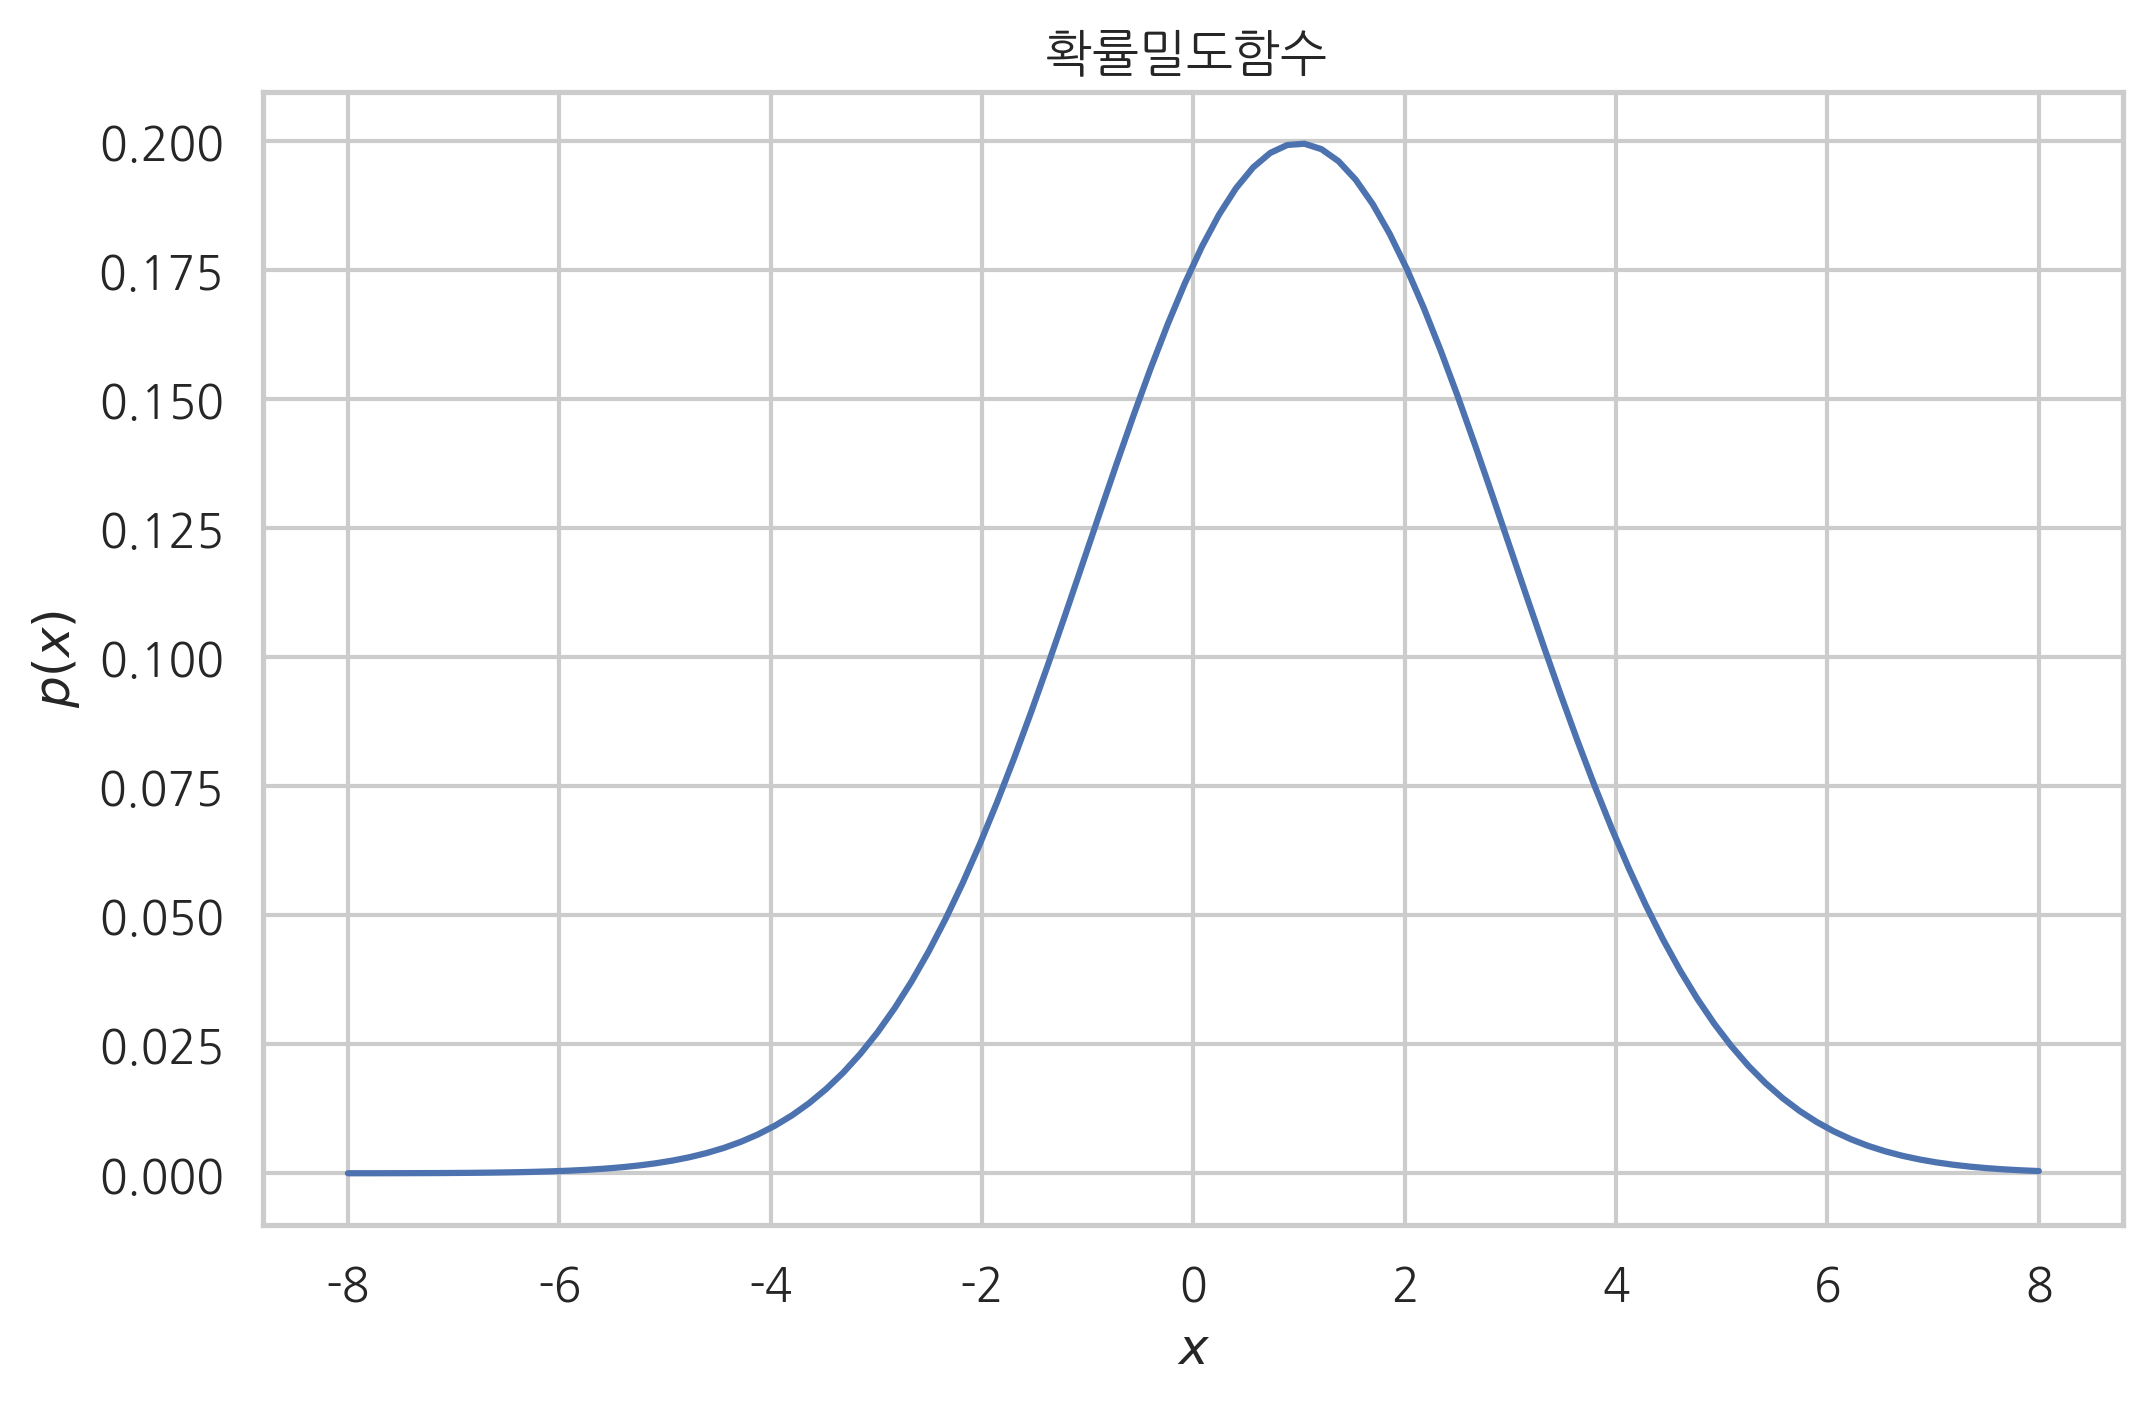

In [ ]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 누적분포함수

`cdf` 메서드는 이산확률변수와 연속확률변수의 누적분포함수의 역할을 한다. 표본 값을 입력하면 해당 표본 값에 대한 누적확률을 출력한다.

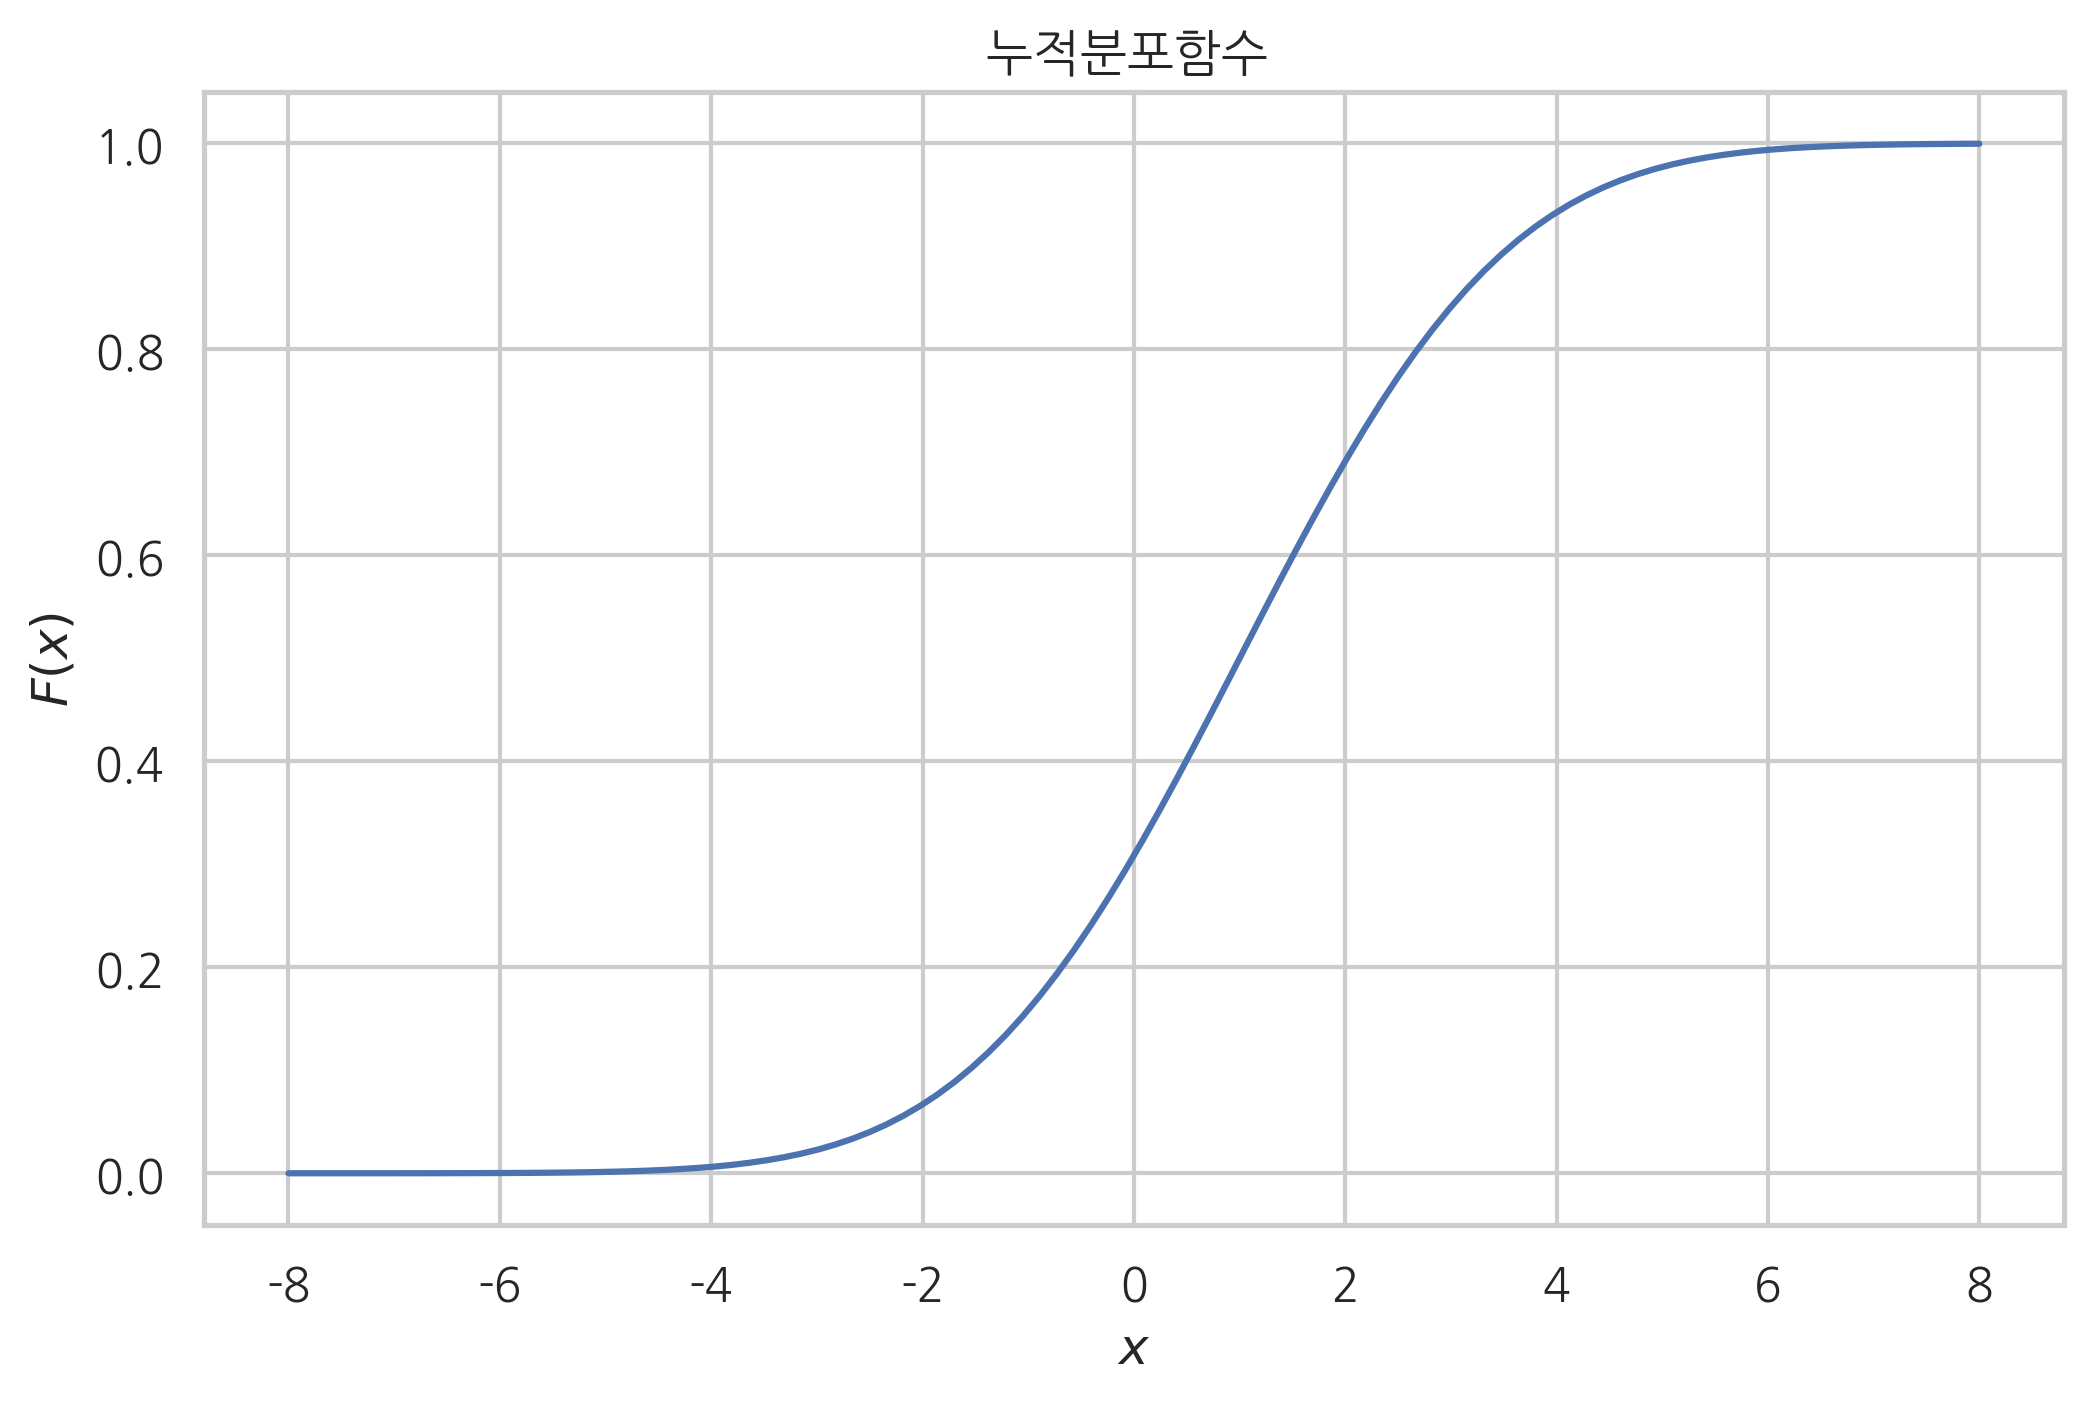

In [ ]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 무작위 표본 생성

무작위로 표본을 만들 때는 `rvs`(random value sampling) 메서드를 사용한다. 이 메서드에서 받는 인수는 다음과 같다.

| 인수 | 의미 |
|-|-|
| `size` | 표본 생성 시 생성될 표본 크기 | 
| `random_state` |  표본 생성 시 사용되는 시드(seed)값 |

In [ ]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

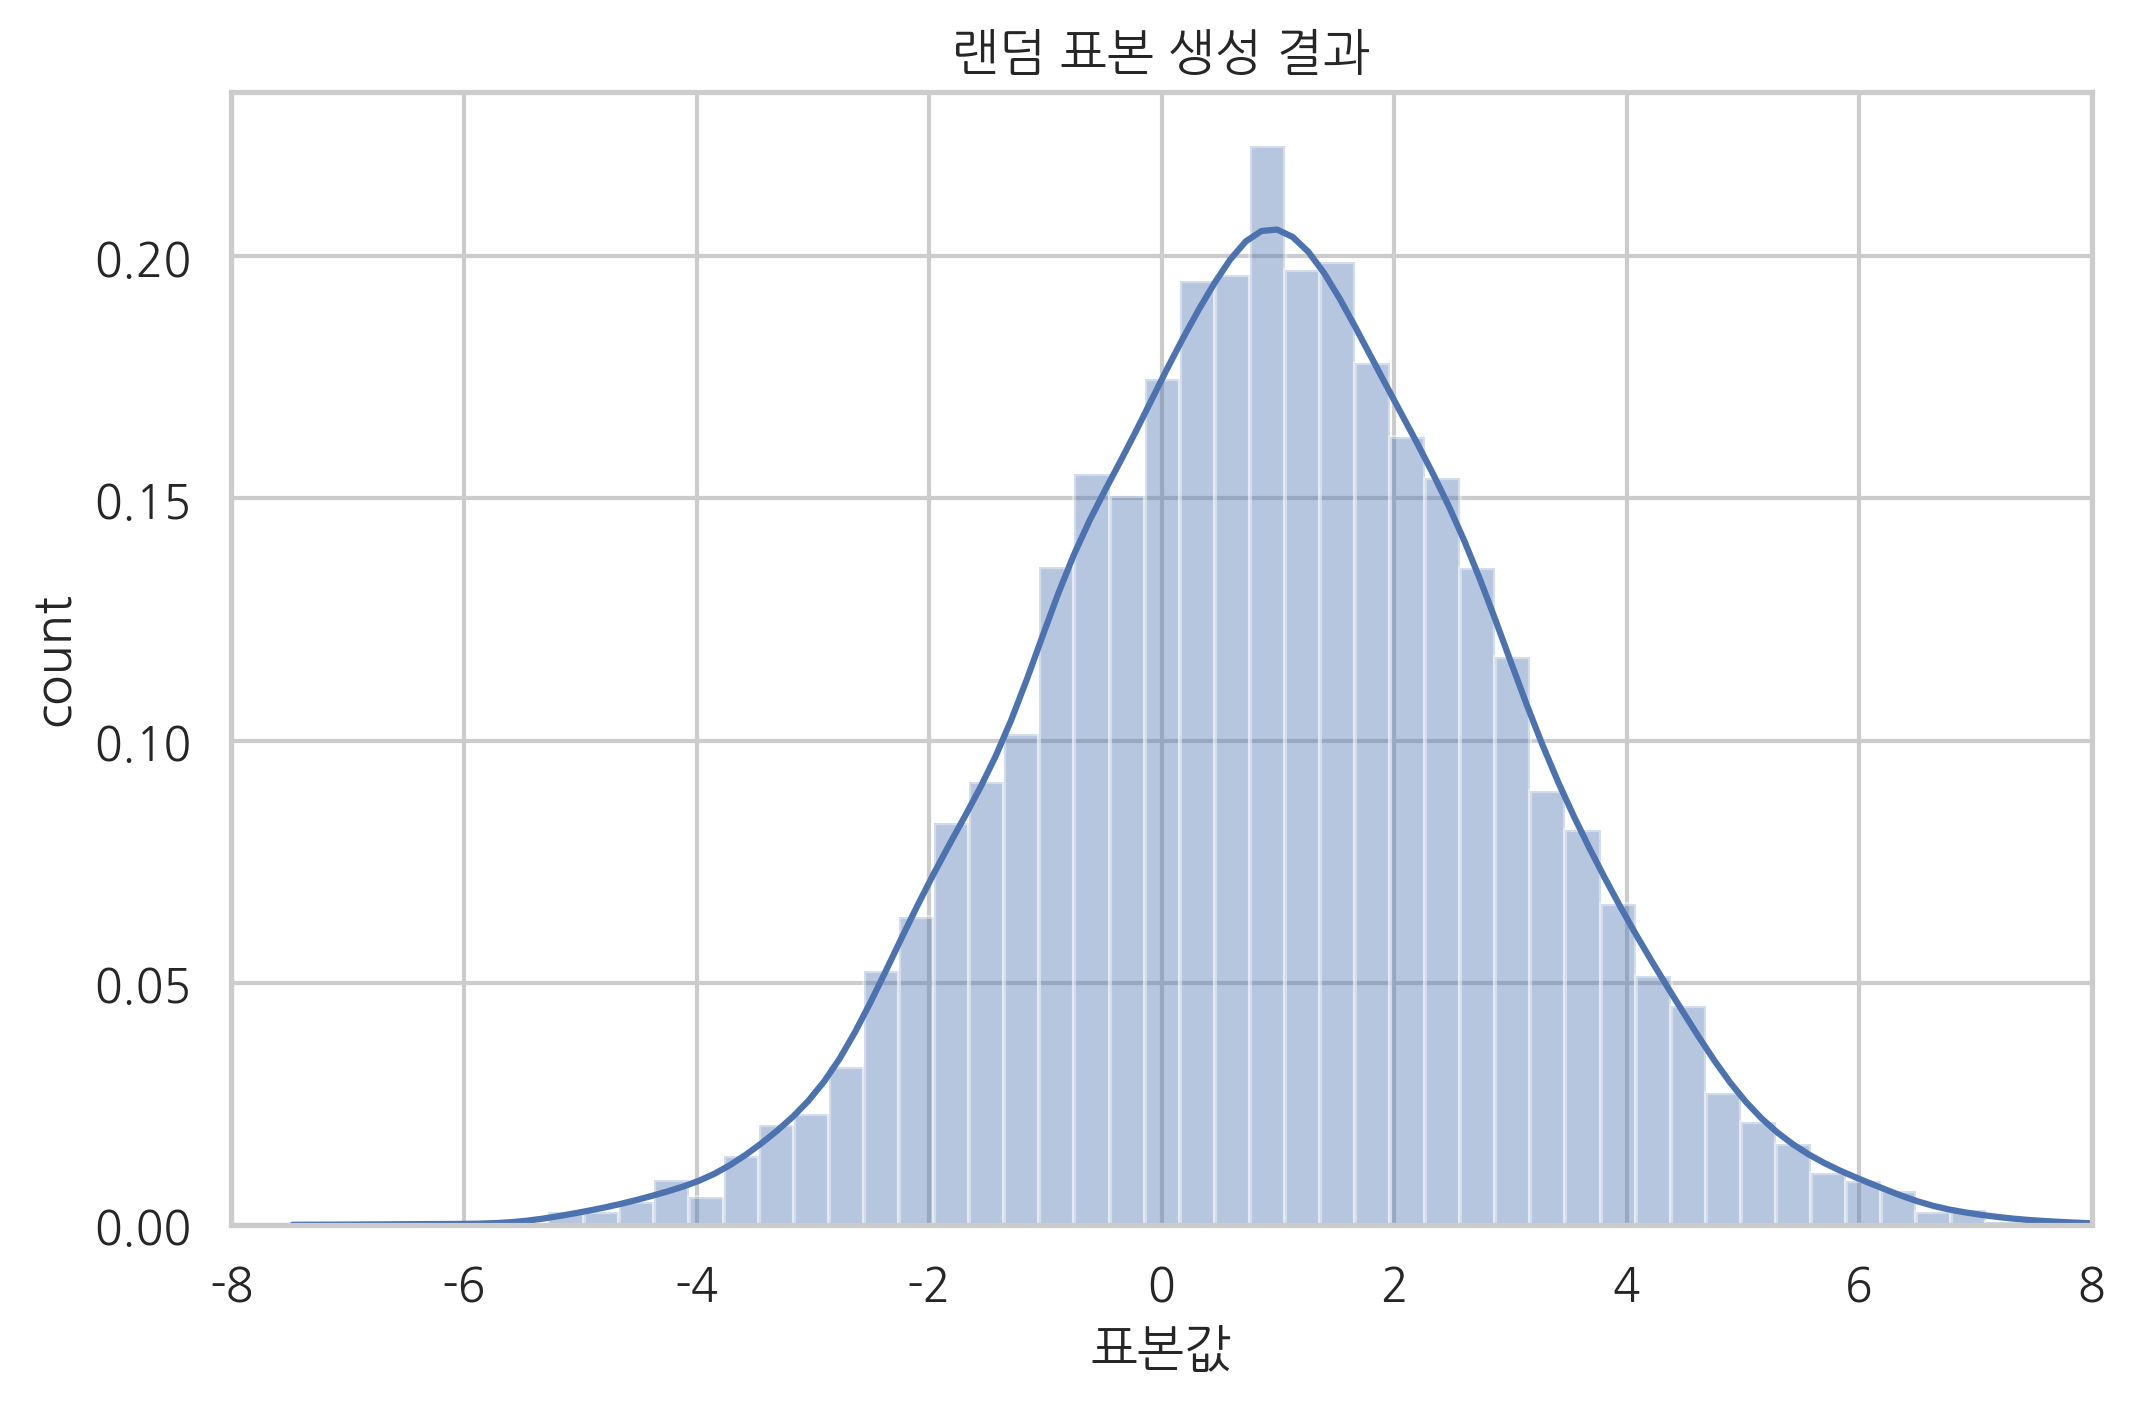

In [ ]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

### 변환 확률변수의 시뮬레이션

시뮬레이션 기능을 사용하면 확률변수의 표본을 가공하여 만들어진 변환(transform) 확률변수의 확률분포도 알 수 있다. 예를 들어 0과 1 사이의 균일분포를 가지는 확률변수에서 두 표본값을 생성하여 이 두 값을 합하면 결과는 어떤 분포를 가질까? 얼핏 생각하듯이 균일분포에서 나온 두 표본값의 합은 균일분포가 되지 않는다. 시뮬레이션으로 확인하면 1에서 최빈값을 가지는 삼각형 모양의 분포가 된다는 것을 알 수 있다.

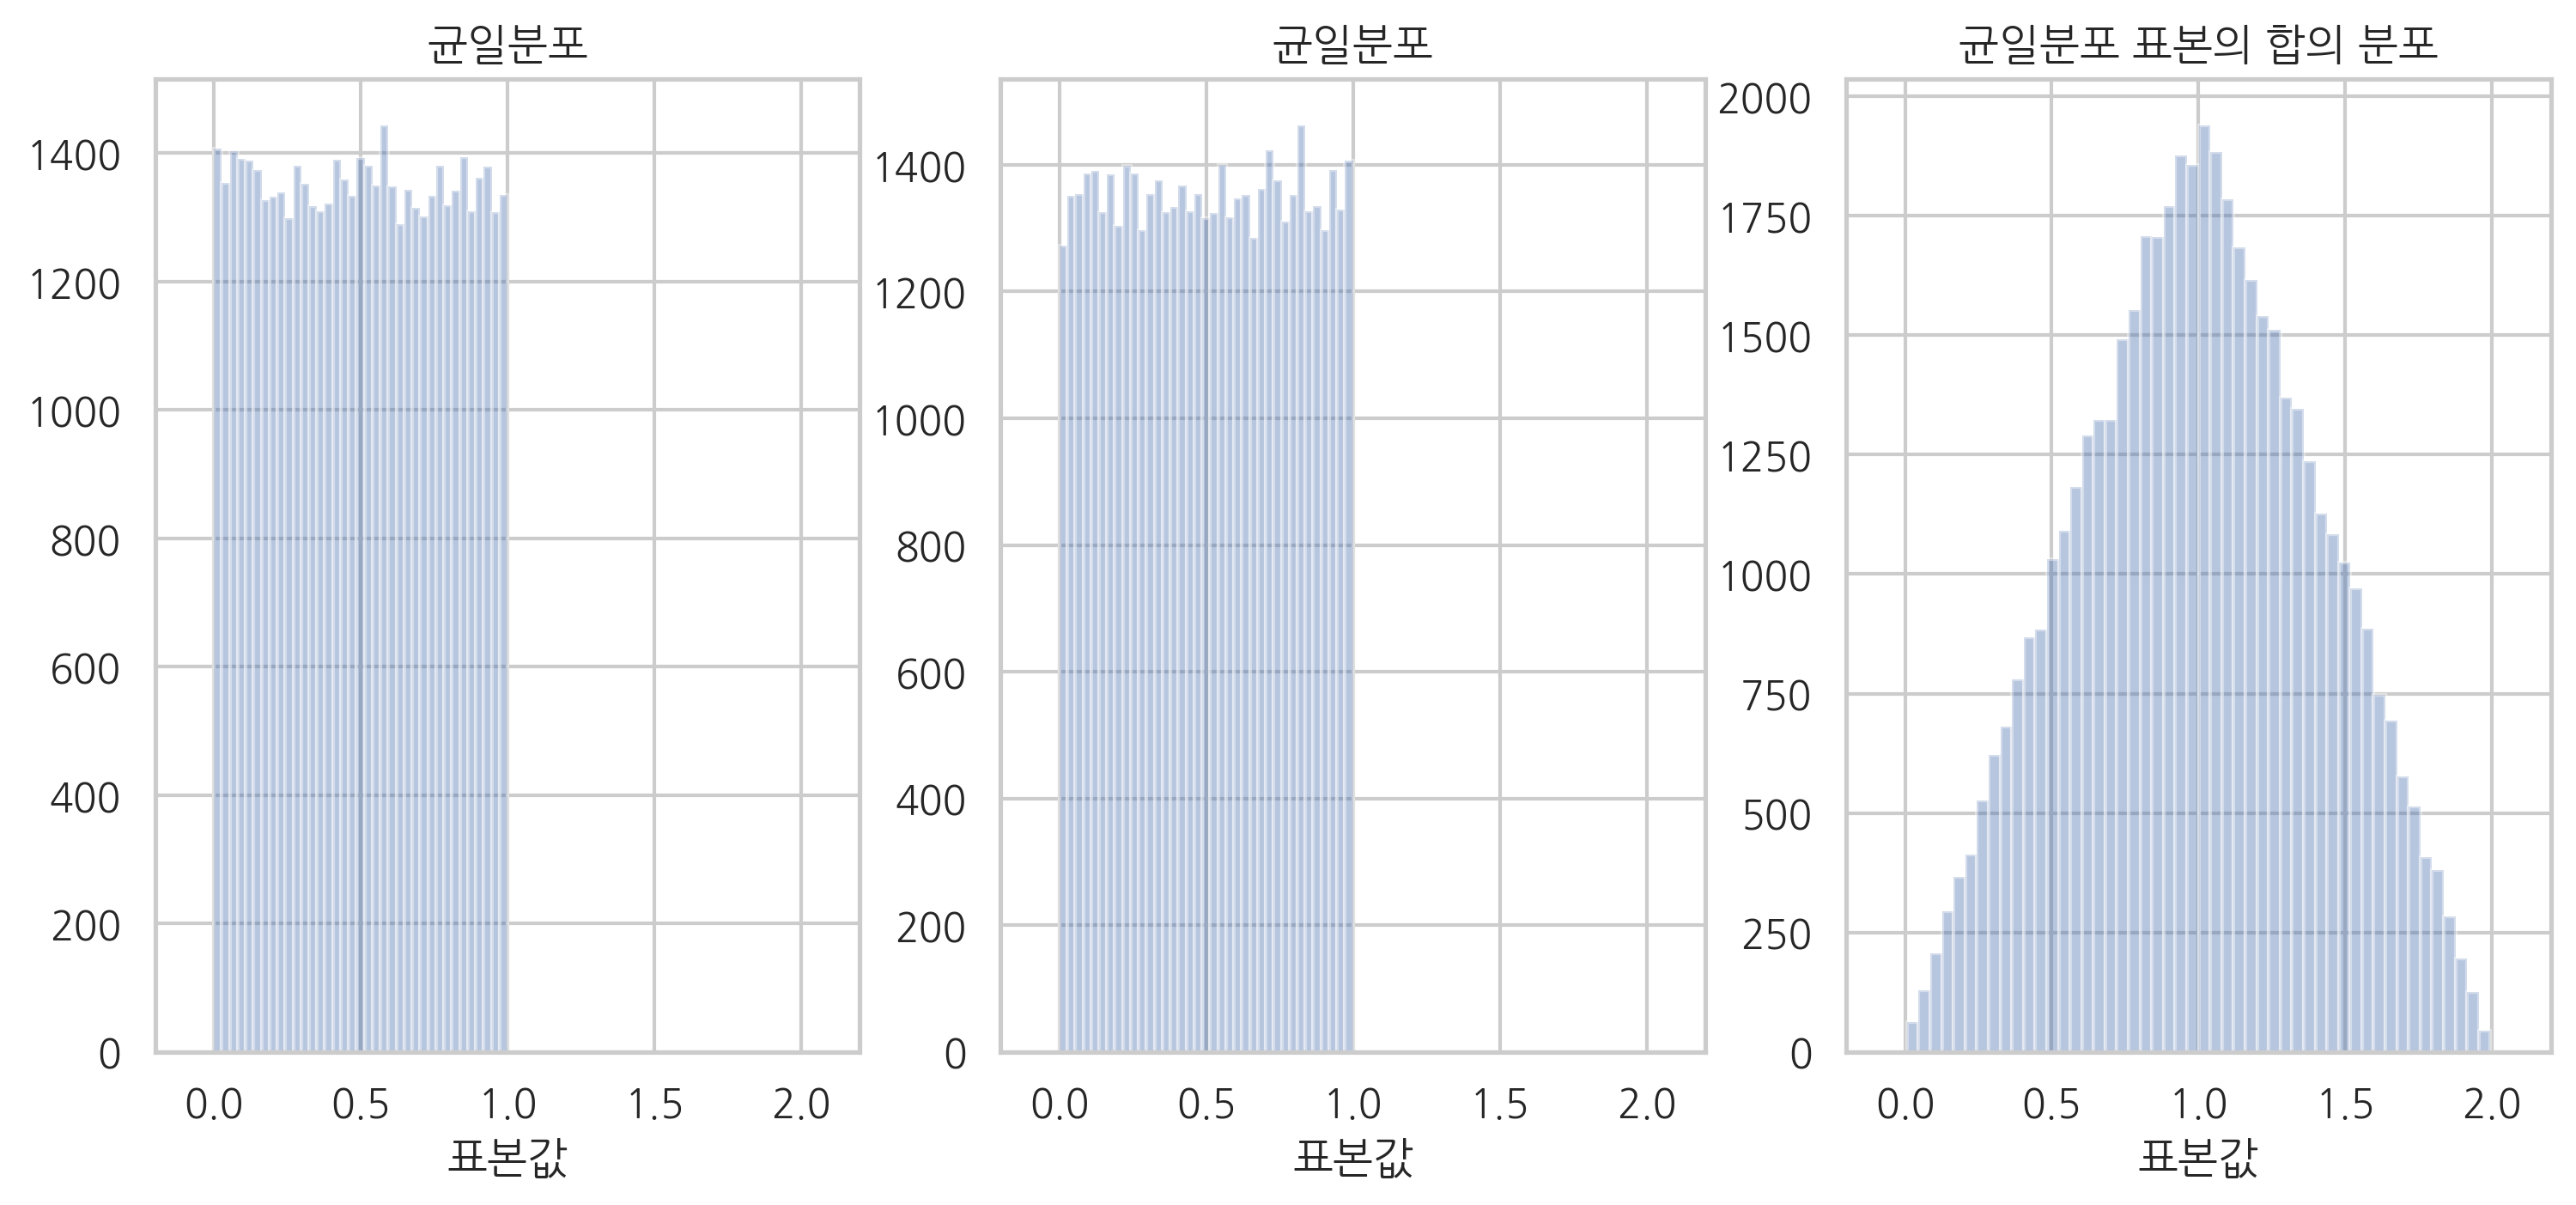

In [ ]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()